### Crop image script
Crop any padding that was made on `leapCropped` images, use the same coordinates on joints image

In [71]:
import os
import tqdm
croppedHandPhotosFolder = "leapCropped"
fileNames = [file for file in 
os.listdir(f"../leapDataCollector/train/{croppedHandPhotosFolder}") if os.path.isfile(os.path.join(f"../leapDataCollector/train/{croppedHandPhotosFolder}", file))]

jointPhotosFolders = ["leapPhotos", "mpPhotos"]

In [73]:
for fileName in tqdm.tqdm(fileNames):
    readPath = f"../leapDataCollector/train/{croppedHandPhotosFolder}/{fileName}"
    writePath = f"train/{croppedHandPhotosFolder}/{fileName}"
    im = cv2.imread(readPath)
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    coords = cv2.findNonZero(gray)
    x,y,w,h = cv2.boundingRect(coords)
    rect = gray[y:y+h, x:x+w]
    cv2.imwrite(writePath, rect) # Save the image
    
    for folder in jointPhotosFolders:
        readPath = f"../leapDataCollector/train/{folder}/{fileName}"
        writePath = f"train/{folder}/{fileName}"
        im = cv2.imread(readPath)
        rect = im[y:y+h, x:x+w]
        cv2.imwrite(writePath, rect)

100%|██████████| 22000/22000 [01:21<00:00, 271.18it/s]


----
#### Drafts below

In [ ]:
!ls ../leapDataCollector/train/leapCropped

In [36]:
!mkdir train/leapPhotos

In [2]:
import cv2
from matplotlib import pyplot as plt

In [63]:
fileNames

['I-1360.jpeg']

In [3]:
path = "../leapDataCollector/train/leapCropped/B-684.jpeg"

In [8]:
im = cv2.imread(path)
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

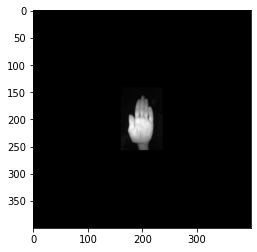

In [9]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

In [24]:
len(gray)

400

In [10]:
import numpy as np
import cv2

coords = cv2.findNonZero(gray) # Find all non-zero points (text)
x, y, w, h = cv2.boundingRect(coords) # Find minimum spanning bounding box
# rect = img[y:y+h, x:x+w] # Crop the image - note we do this on the original image
# cv2.imwrite("rect.png", rect) # Save the image
gray = cv2.rectangle(gray, (x+w, y+h), (x,y), 255,1)

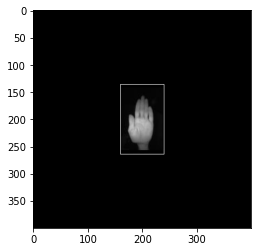

In [11]:
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

In [28]:
pathJoint = "../leapDataCollector/train/leapPhotos/B-684.jpeg"

In [29]:
jointImg = cv2.imread(pathJoint)

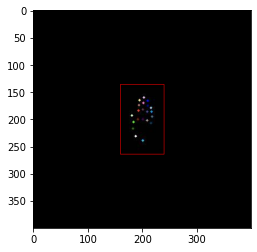

In [30]:
jointIm = cv2.cvtColor(jointImg, cv2.COLOR_BGR2RGB)
jointIm = cv2.rectangle(jointIm, (x+w, y+h), (x,y), 255,1)
plt.imshow(jointIm)
plt.show()